In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

In [196]:
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test (1).csv')

In [16]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [17]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [18]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [19]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [20]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [197]:
# Removing the columns that are not useful for this project
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis=1)

### Check if the dependent variable is balanced:

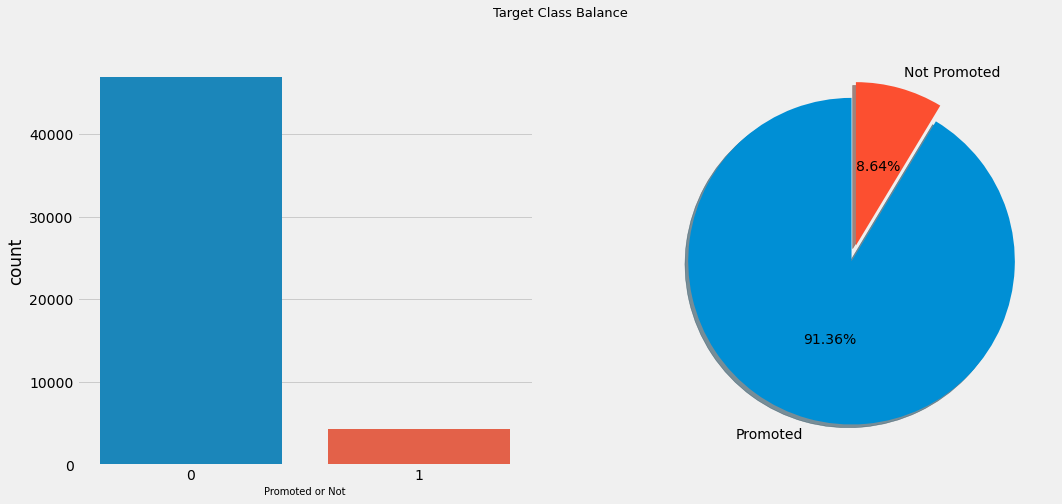

In [151]:
plt.subplot(1,2,1)
sns.countplot(train['is_promoted'],)
plt.xlabel('Promoted or Not', fontsize = 10)

plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot(kind='pie', explode=[0, 0.1], autopct='%.2f%%', startangle=90, 
                                         labels=['Promoted','Not Promoted'], shadow=True, pctdistance=0.5)
plt.axis('off')
plt.suptitle('Target Class Balance', fontsize=13)
plt.show()

We can see the response variable is highly imbalanced. 

### Treating missing values

In [198]:
total_missing_train = train.isnull().sum()
missing_percent_train = ((total_missing_train / train.shape[0])*100).round(2)

total_missing_test = test.isnull().sum()
missing_percent_test = ((total_missing_test / test.shape[0])*100).round(2)

In [199]:
missing_data = pd.concat([total_missing_train, missing_percent_train, total_missing_test, missing_percent_test],
                                axis=1, 
                                keys=['Total_Train', 'Percent_Train %','Total_Test', 'Percent_Test %'],
                                sort = True)

# lets check the head
missing_data.style.bar(color = ['gold'])

,Total_Train,Percent_Train %,Total_Test,Percent_Test %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000
no_of_trainings,0,0.000000,0.000000,0.000000


Since only two columns have missing values and the percentages of missing values are low, there is no need to drop any columns. These missing values can be replaced by the mode of their respective columns. 

In [200]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [155]:
train.isnull().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [156]:
test.isnull().sum()

department              0
education               0
gender                  0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Checking for Outliers

In [157]:
train.select_dtypes('number').head()

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,8,1,0,49,0
1,1,30,4,0,0,60,0
2,1,34,7,0,0,50,0
3,2,39,10,0,0,50,0
4,1,45,2,0,0,73,0


The only two columns that could potentially have outliers are avg_training_score and length_of_service. 

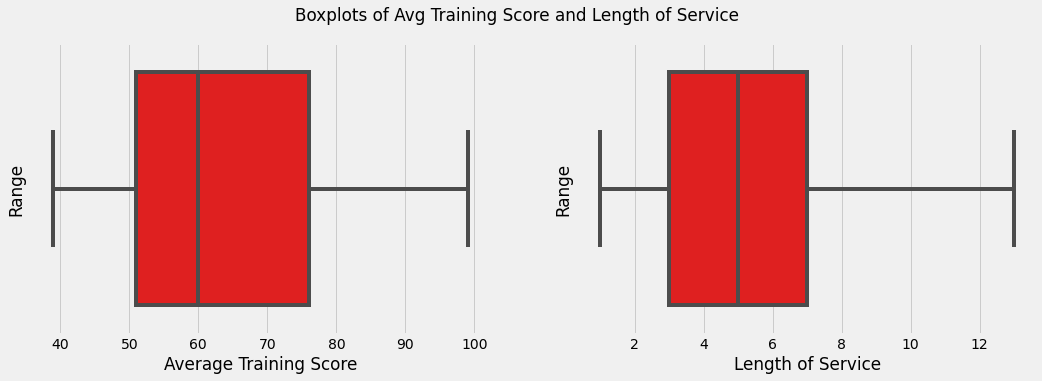

In [158]:
plt.rcParams['figure.figsize'] = (16,5)
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score')
plt.ylabel('Range')
plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service')
plt.ylabel('Range')

plt.suptitle('Boxplots of Avg Training Score and Length of Service')
plt.show()

Length of service has some outliers. 

In [159]:
train = train[train['length_of_service']<=13]

### Univariate Analysis

Text(0.5, 1.0, 'Awards Won?')

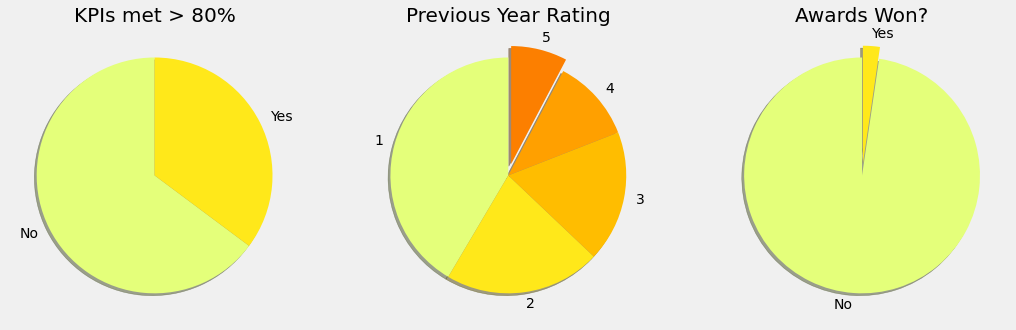

In [189]:
# Pie chart of KMIs_met >80%
plt.subplot(1,3,1)
labels = ['No', 'Yes']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('KPIs met > 80%', fontsize = 20)

# Pie chart of previous year rating 
plt.subplot(1,3,2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Previous Year Rating', fontsize = 20)

# Pie chart of awards won 
plt.subplot(1,3,3)
labels = ['No', 'Yes']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Awards Won?', fontsize = 20)

Text(0.5, 1.0, 'Distribution of the Number of Trainings Taken by the Employees')

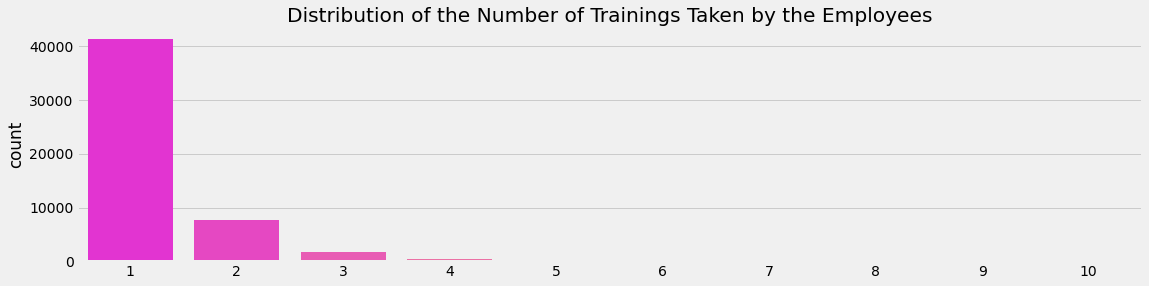

In [161]:
# Make a countplot of the number of trainings 
plt.rcParams['figure.figsize'] = (17,4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel('')
plt.title('Distribution of the Number of Trainings Taken by the Employees')

Text(0.5, 1.0, 'Distribution of Employee Ages')

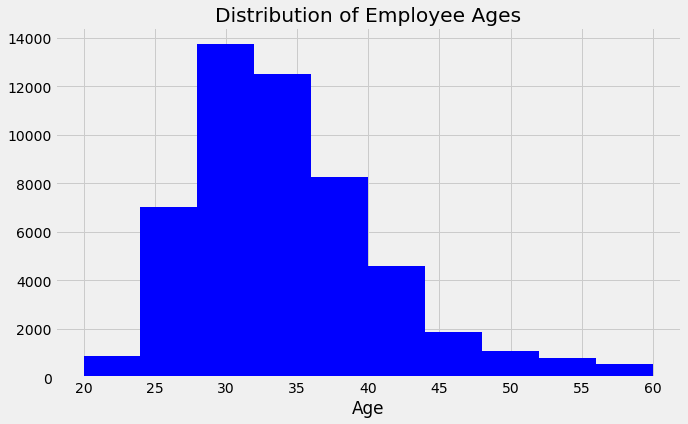

In [162]:
# Histogram of age 
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(train['age'], color = 'blue')
plt.xlabel('Age')
plt.title('Distribution of Employee Ages')

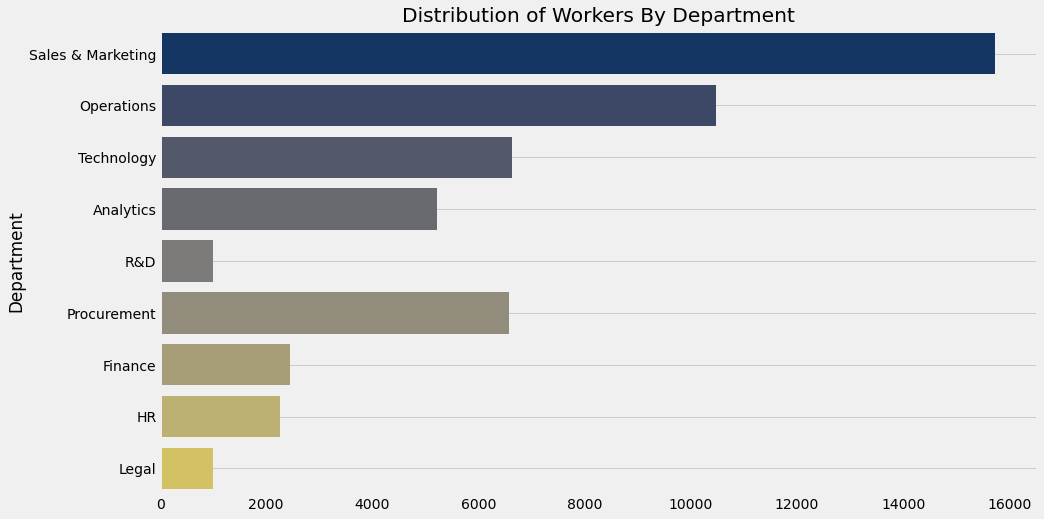

In [163]:
# Distribution of the number of workers by department 
plt.rcParams['figure.figsize'] = (14,8)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department')
plt.title('Distribution of Workers By Department')
plt.grid()

In [165]:
train['education'].value_counts()

Bachelor's          37348
Master's & above    13166
Below Secondary       805
Name: education, dtype: int64

Text(0.5, 1.0, 'Gender')

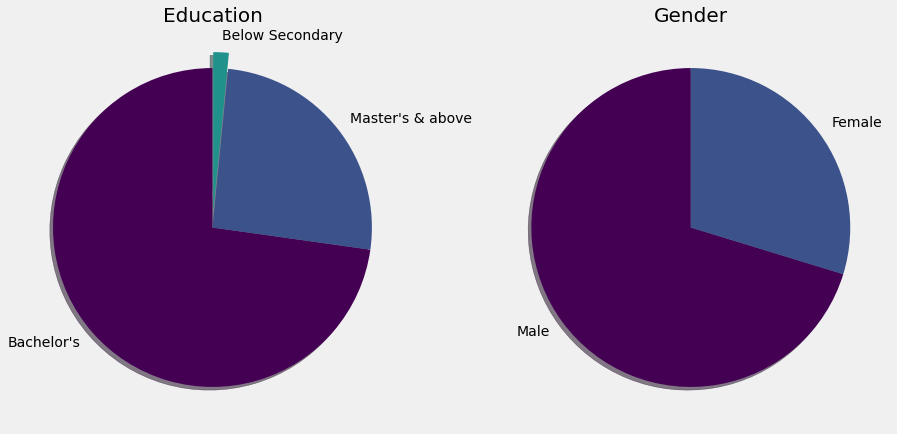

In [166]:
# Pie chart of education
plt.subplot(1,2,1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.viridis(np.linspace(0,1,5))
explode = [0,0,0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Education', fontsize = 20)

# Pie chart of gender
plt.subplot(1,2,2)
labels = ['Male', 'Female']
sizes = train['gender'].value_counts()
colors = plt.cm.viridis(np.linspace(0,1,5))
explode = [0,0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Gender', fontsize = 20)

### Bivariate Analysis

Text(0.5, 0, '')

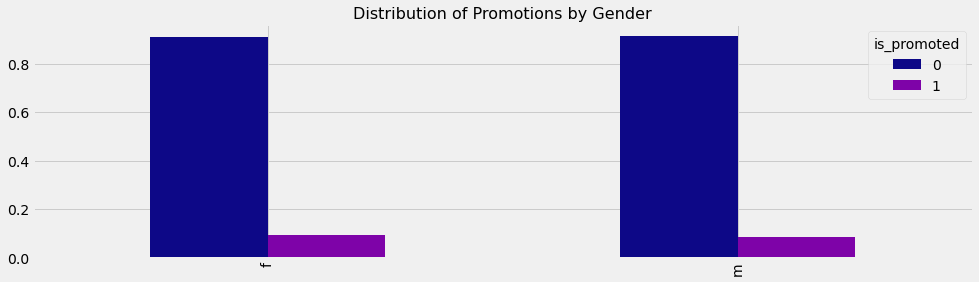

In [167]:
# Bivariate analysis of gender and promotion
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.plasma(np.linspace(0,1,5))
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=colors)
plt.title('Distribution of Promotions by Gender', fontsize = 16)
plt.xlabel('')

Text(0.5, 0, '')

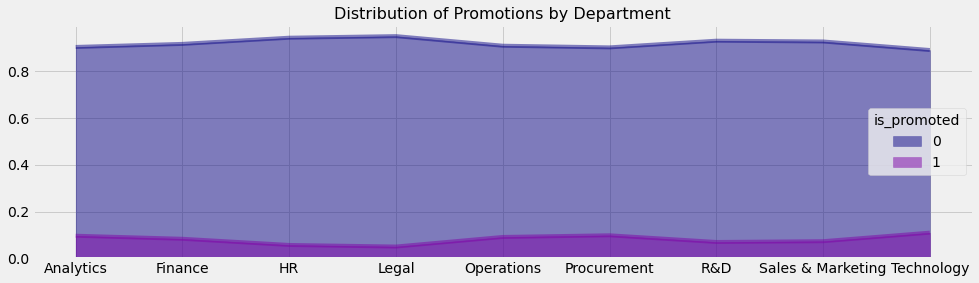

In [168]:
# Bivariate analysis of department and promotion
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.plasma(np.linspace(0,1,5))
x.div(x.sum(1).astype(float), axis=0).plot(kind='area', stacked=False, color=colors)
plt.title('Distribution of Promotions by Department', fontsize = 16)
plt.xlabel('')

Text(0, 0.5, 'Age')

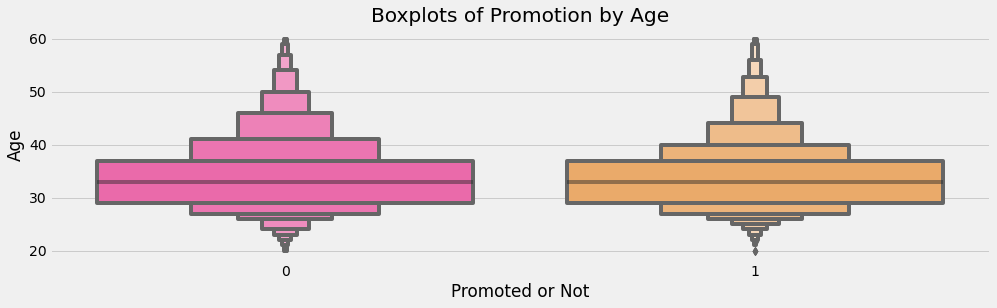

In [169]:
# Bivariate analysis of age and promotion
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'spring')
plt.title('Boxplots of Promotion by Age')
plt.xlabel('Promoted or Not')
plt.ylabel('Age')

Text(0, 0.5, 'Average Training Score')

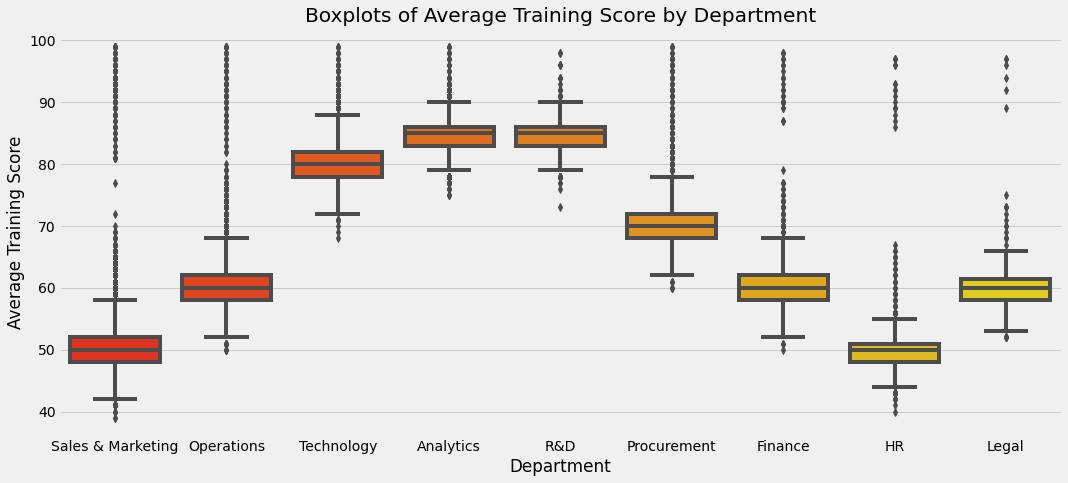

In [170]:
# Bivariate anaysis of department and average training score
plt.rcParams['figure.figsize'] = (16,7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Boxplots of Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')

### Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heat Map')

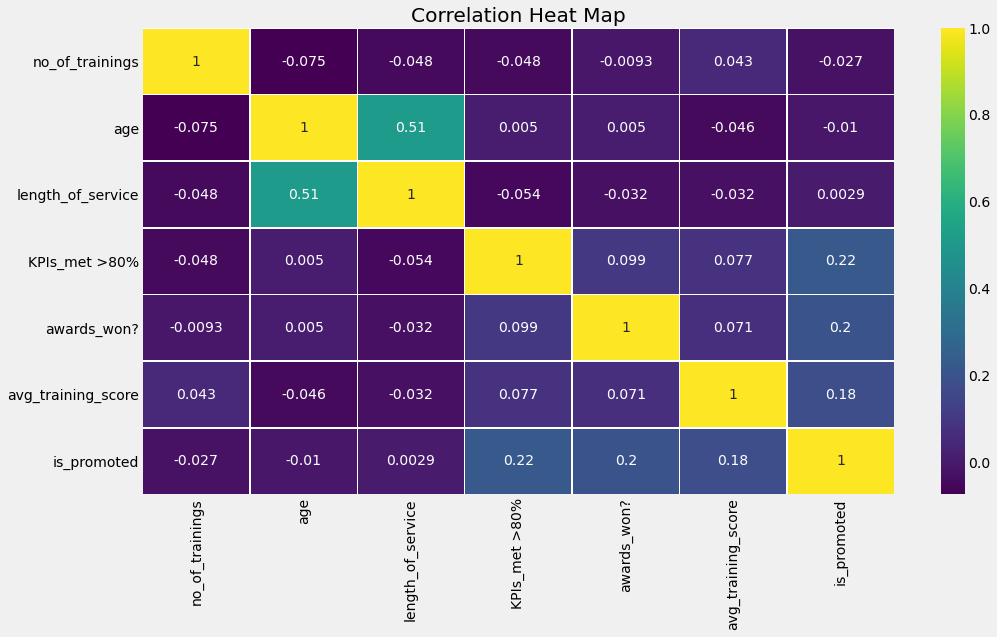

In [171]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(train.corr(), annot=True, linewidth=0.5, cmap='viridis')
plt.title('Correlation Heat Map')

Text(0.5, 1.0, 'Distribution of Average Training Score')

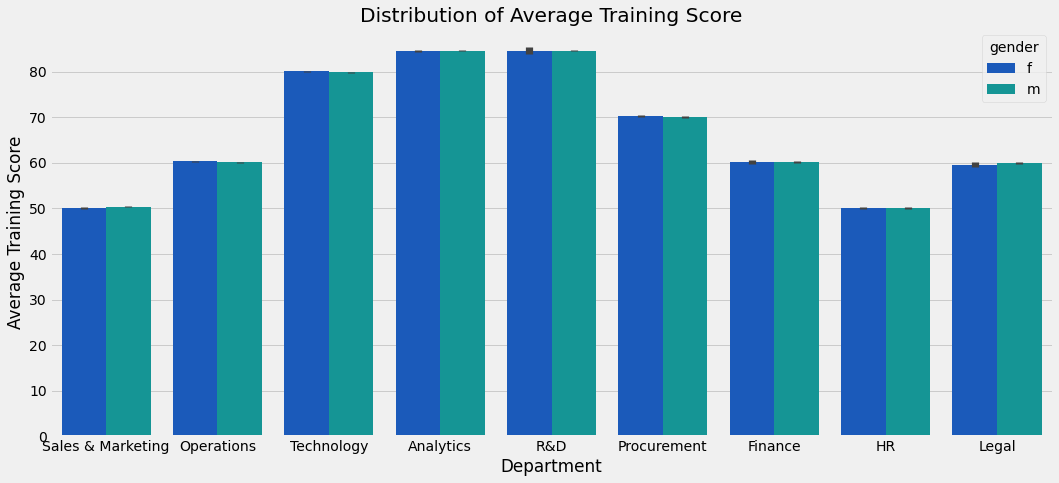

In [172]:
plt.rcParams['figure.figsize']= (16,7)
sns.barplot(train['department'], train['avg_training_score'], hue=train['gender'], palette='winter')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.title('Distribution of Average Training Score')

### Feature engineering

In [201]:
# Add sum_metric column to both training and testing datasets 
train['sum_metric'] = train['awards_won?'] + train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['KPIs_met >80%'] + test['previous_year_rating']

# Add total_score column to both training and testing datasets 
train['total_score'] = train['avg_training_score']*train['no_of_trainings']
test['total_score'] = test['avg_training_score']*test['no_of_trainings']

### Encoding categorical variables

In [193]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [194]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [208]:
# Encode department and gender using LabelEncoder, since they don't have hierarchy
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

In [209]:
# Encode education 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), 
                                               (3,2,1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"), 
                                               (3,2,1))

### Build the model 

In [210]:
# Split the data into x and y 
y = train['is_promoted']
x = train.drop('is_promoted', axis=1)
x_test = test

print(y.shape)
print(x.shape)
print(x_test.shape)

(54808,)
(54808, 12)
(23490, 12)


In [219]:
# Resample the data 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)
ros.fit(x, y)

x_resampled, y_resampled = ros.fit_resample(x,y)

In [224]:
print(y_resampled.shape)
print(x_resampled.shape)

(100280,)
(100280, 12)
(100280,)
(100280, 12)


In [232]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state = 0)


In [234]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.fit_transform(x_test)

In [237]:
from sklearn.tree import DecisionTreeClassifier 

model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

y_pred = model_tree.predict(x_valid)

### Model performance

Training accuracy: 0.994652473075389
Testing accuracy: 0.9643996808934983


Text(0.5, 1.0, 'Confusion Matrix')

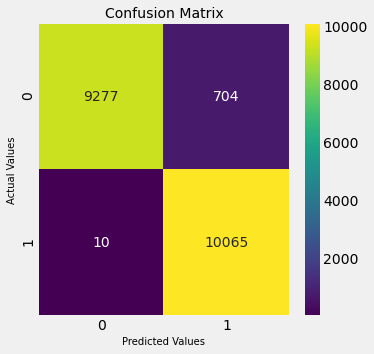

In [255]:
from sklearn.metrics import confusion_matrix, classification_report 

print('Training accuracy:', model_tree.score(x_train, y_train))
print('Testing accuracy:', model_tree.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
cm
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot=True, cmap='viridis', fmt = 'd')
plt.xlabel('Predicted Values', fontsize = 10)
plt.ylabel('Actual Values', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 14)

In [256]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9981
           1       0.93      1.00      0.97     10075

    accuracy                           0.96     20056
   macro avg       0.97      0.96      0.96     20056
weighted avg       0.97      0.96      0.96     20056



__Possible improvements of the model:__
1. The region column was removed. Instead of removing it, it could be categorized into bins and an analysis could be done on which regions an employee is more likely to get a promotion. 
2. Scaling is not a necessary step, as a decision tree model was used. 
3. The model could be tuned using Grid Search. 